# WMS Analysis Example

In [1]:
from owslib.wms import WebMapService

In [3]:
wms=WebMapService('http://ereeftds.bom.gov.au/ereefs/tds/wms/ereefs/RT2_gridAgg_P1D_SST')

In [4]:
list(wms.contents)

['sst1day',
 'ssta1day',
 'ssta_leg1day',
 'sst_mosaic',
 'ssta_mosaic_imos',
 'ssta_mosaic_leg']

In [6]:
bbox=wms['sst_mosaic'].boundingBox

In [7]:
bbox

(142.00999450683594,
 -25.489999771118164,
 155.99000549316406,
 -9.510000228881836,
 'EPSG:4326')

In [18]:
times=wms['sst_mosaic'].timepositions

In [19]:
len(times)

5678

In [39]:
times[-10:]

['2017-10-08T15:20:00.000Z',
 '2017-10-09T15:20:00.000Z',
 '2017-10-10T15:20:00.000Z',
 '2017-10-11T15:20:00.000Z',
 '2017-10-12T15:20:00.000Z',
 '2017-10-13T00:00:00.000Z',
 '2017-10-14T15:20:00.000Z',
 '2017-10-15T15:20:00.000Z',
 '2017-10-16T15:20:00.000Z',
 '2017-10-17T15:20:00.000Z']

In [88]:
img = wms.getmap(layers = ['sst_mosaic'],
                 srs='EPSG:4326',
                 bbox=(142.00999450683594,-25.489999771118164,155.99000549316406,-9.510000228881836),
                 size=(500,500),
                 format='image/png',time='2017-10-17T15:20:00.000Z',style='boxfill/occam',
                transparent = True)

In [89]:
out=open('sst_map.png', 'wb')

In [90]:
out.write(img.read())

57654

In [91]:
from IPython.display import Image

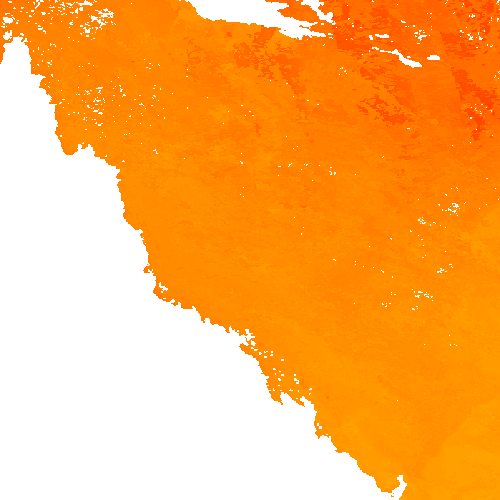

In [92]:
Image('sst_map.png')

The main problem with this map is that the colours have all fallen within the orange-red part of the colour scale so it's hard to interpret visually. Using Matplotlib we can change this.

In [95]:
legendURL=wms['sst_mosaic'].styles['boxfill/occam']['legend']

In [96]:
Image(url=legendURL)

This 

In [50]:
%matplotlib inline

In [52]:
import matplotlib.pyplot as plt

In [53]:
import matplotlib.image as mpimg

In [62]:
sst_img=mpimg.imread('sst_map.png')

In [63]:
sst_img.shape

(500, 500, 4)

In [64]:
sst_data=sst_img[:,:,1]

In [83]:
import numpy as np

Now plot the data with a better colour map. 

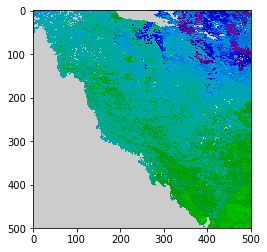

In [76]:
plt.imshow(sst_data, cmap='nipy_spectral') # to do - mask out the background

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+01,   1.05300000e+03,
          2.80900000e+03,   3.31600000e+03,   1.07410000e+04,
          1.64710000e+04,   5.00410000e+04,   6.84030000e+04,
          8.96700000e+03,   6.40000000e+01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]),
 array([ 0.    ,  0.0495,  0.099 ,  0.1485,  0.198 ,  0.2475,  0.297 ,
         0.3465,  0.396 ,  0.4455,  0.495 ,  0.5445,  0.594 ,  0.6435,
         0.693 ,  0.7425,  0.792 ,  0.8415,  0.891 ,  0.9405,  0.99  ]),
 <a list of 20 Patch objects>)

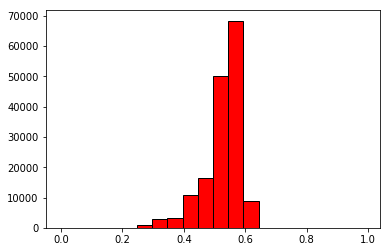

In [103]:
plt.hist(sst_data.ravel(), facecolor='red', edgecolor='black', bins=20, range=(0.00,0.99))

but what do the numbers mean.... to do...

In [98]:
np.amin(sst_data), np.amax(sst_data)

(0.24705882, 1.0)

In [104]:
scaled_data=sst_data*50

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          6.10000000e+01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   4.16000000e+02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   5.76000000e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          9.02000000e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.13200000e+03,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   7.75000000e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.79000000e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.03900000e+03,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.79800000e+03,
        

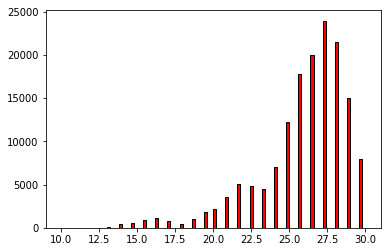

In [108]:
plt.hist(scaled_data.ravel(), facecolor='red', edgecolor='black', bins=4
         0, range=(10,30))